In [1]:
import matplotlib.pyplot as plt
import matplotlib
import setup
import numpy as np
from scipy.interpolate import CubicSpline
from dataloaders import DemoDataset
from utils import read_json

In [2]:
# setup dataloader instances
cfg = read_json("config.json")
dataset_cfg = cfg["dataset"]
dataloader_cfg = cfg["dataloader"]
test_cfg = cfg["test"]
dataset_cfg["params"]["fnames"] = ["recording_0002_2020_12_3.h5"]

dataset = DemoDataset(**dataset_cfg["params"])

dataset start time 0.5355069637298584, end time 13.734471321105957
there are 1320 samples


### Cubic spline with eperate interpolation on x, y, z

In [3]:
# original data points from the bag file, without interpolation
x_orig = dataset.all_actions_time
yo_x = dataset.all_actions_pos[:, 0]
yo_y = dataset.all_actions_pos[:, 1]
yo_z = dataset.all_actions_pos[:, 2]

# sampled data under 100 hz and 
x_sample = dataset.sample_time
ys_x = dataset.paired_states_actions[:, 1, 0]
ys_y = dataset.paired_states_actions[:, 1, 1]
ys_z = dataset.paired_states_actions[:, 1, 2]

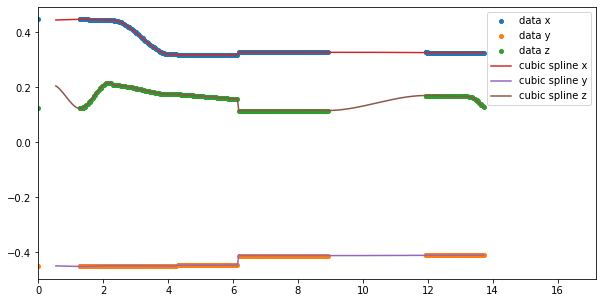

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_orig, yo_x, 'o', label='data x', markersize=4)
ax.plot(x_orig, yo_y, 'o', label='data y', markersize=4)
ax.plot(x_orig, yo_z, 'o', label='data z', markersize=4)

ax.plot(x_sample, ys_x, label='cubic spline x', markersize=2)
ax.plot(x_sample, ys_y, label='cubic spline y', markersize=2)
ax.plot(x_sample, ys_z, label='cubic spline z', markersize=2)
ax.legend(loc='upper right')
ax.set_xlim(0, 17.2)
plt.show()

### A try for 3D visualization
the marker grows bigger over time

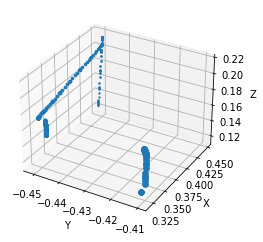

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in range(len(x_orig)):
    ax.scatter( yo_y[t], yo_x[t], yo_z[t], label="original data", s=t/10, c='#1f77b4')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
plt.show()

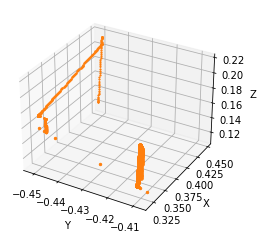

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in range(0, len(x_sample), 2):
    ax.scatter(ys_y[t], ys_x[t], ys_z[t], label="interp data", s=t/100, c='#ff7f0e')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
plt.show()

### Zero order results

In [7]:
zero_order_cfg = dataset_cfg["params"].copy()
zero_order_cfg["preprocess"]["interp"]["pos"] = "zero_order"
z_dataset = DemoDataset(**zero_order_cfg)

dataset start time 0.5355069637298584, end time 13.734471321105957
there are 1320 samples


In [8]:
# original data points from the bag file, without interpolation
x_orig = z_dataset.all_actions_time
yo_x = z_dataset.all_actions_pos[:, 0]
yo_y = z_dataset.all_actions_pos[:, 1]
yo_z = z_dataset.all_actions_pos[:, 2]

# sampled data under 100 hz and 
x_sample = z_dataset.sample_time
ys_x = z_dataset.paired_states_actions[:, 1, 0]
ys_y = z_dataset.paired_states_actions[:, 1, 1]
ys_z = z_dataset.paired_states_actions[:, 1, 2]

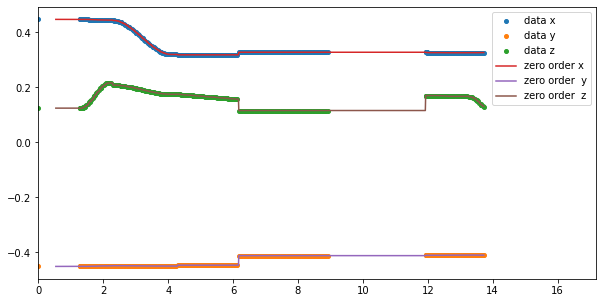

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_orig, yo_x, 'o', label='data x', markersize=4)
ax.plot(x_orig, yo_y, 'o', label='data y', markersize=4)
ax.plot(x_orig, yo_z, 'o', label='data z', markersize=4)

ax.plot(x_sample, ys_x, label='zero order x', markersize=2)
ax.plot(x_sample, ys_y, label='zero order  y', markersize=2)
ax.plot(x_sample, ys_z, label='zero order  z', markersize=2)
ax.legend(loc='upper right')
ax.set_xlim(0, 17.2)
plt.show()

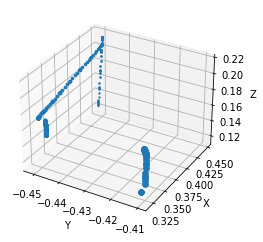

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in range(len(x_orig)):
    ax.scatter( yo_y[t], yo_x[t], yo_z[t], label="original data", s=t/10, c='#1f77b4')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
plt.show()

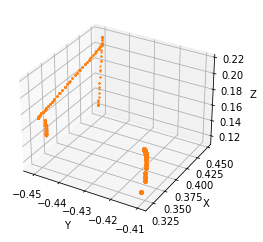

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in range(0, len(x_sample), 2):
    ax.scatter(ys_y[t], ys_x[t], ys_z[t], label="interp data", s=t/100, c='#ff7f0e')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
plt.show()